In [1]:
from Coulomb import *
from plotting import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
matplotlib.__version__

'3.1.3'

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [15]:
t3, vHist3 = test.beam_EM(17000, 500, 1E-3, 0.5, 1000)
t3, vHist3_MEM = test.beam_MEM(17000, 500, 1E-3, 0.5, 1000)
t3, vHist3_strat = test.beam_EM(17000, 500, 1E-3, 0.5, 1000, strat = True)

[  0. 100. 200. 300. 400. 501.]


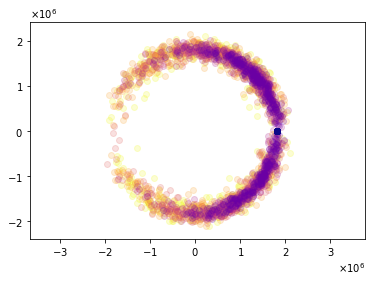

In [13]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3_strat, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
# vSpaceSnaps(ax, vHist3_MEM, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)

# formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', 
#               title = 'Velocity Space', fontsize = 16, filename = 'Circle_snaps_MEM.pdf')

In [16]:
t4, vHist4 = test.beam_EM(17000, 500, 1E-4, 0.5, 1000)
t4, vHist4_MEM = test.beam_MEM(17000, 500, 1E-4, 0.5, 1000)
t4, vHist4_strat = test.beam_EM(17000, 500, 1E-4, 0.5, 1000, strat = True)

[   0.  200.  400.  600.  800. 1001.]


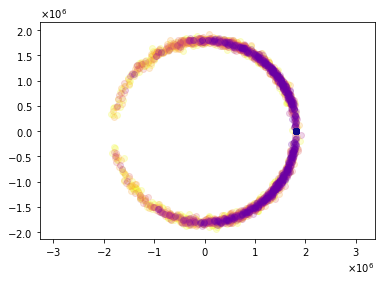

In [17]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist4_strat, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)